In [ ]:
# from google.colab import drive
# drive.mount('\content\gdrive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#from kmodes.kmodes import KModes

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NITT datasets/OSMI 2021 Mental Health in Tech Survey Results .csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = None

In [ ]:
data.shape

(131, 124)

In [ ]:
data.isna().sum().sum()/(131*124)

0.5406919477961093

In [ ]:
data.head(1)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [ ]:
#printing percentage of missing values

a = data.isna().sum()
print((100*(a/len(data))))

#                                                                                                                                                                                                                                     0.000000
*Are you self-employed?*                                                                                                                                                                                                              0.000000
How many employees does your company or organization have?                                                                                                                                                                           12.977099
Is your employer primarily a tech company/organization?                                                                                                                                                                              12.977099
Is your primary role within your company rel

In [ ]:
#Create filter
max_na = (0.9 * len(data))
max_na

117.9

In [ ]:
#Filter dataset
data = data.loc[:,(data.isnull().sum(axis=0) <= max_na)]

In [ ]:
#View the shape of our 'new' dataframe
data.shape

(131, 83)

In [ ]:
import pandas as pd

In [ ]:
               data.columns.to_list()

['#',
 '*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comfortable talking to you

In [ ]:
data.drop(columns=['#',
                   'Do you know the options for mental health care available under your employer-provided health coverage?',
                   'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                   'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                   'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                   'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
                   'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                   'Have you ever discussed your mental health with your employer?',
                     'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
                     'Would you feel comfortable discussing a mental health issue with your coworkers?',
                     'Have you ever discussed your mental health with coworkers?',
                     'Describe the conversation with coworkers you had about your mental health including their reactions.',
                     "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                     'Describe the conversation your coworker had with you about their mental health (please do not use names).',
                     'Overall, how much importance does your employer place on physical health?',
                     'Overall, how much importance does your employer place on mental health?',
                   'Do you know local or online resources to seek help for a mental health issue?',
                     'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
                     'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
                     'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                     'Do you believe your productivity is ever affected by a mental health issue?',
                     '*Do you have previous employers?*',
                     'Was your employer primarily a tech company/organization?',
                     'Have your previous employers provided mental health benefits?',
                     'Were you aware of the options for mental health care provided by your previous employers?',
                     'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
                     'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
                     'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
                     'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
                     'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                     'Did you ever discuss your mental health with your previous employer?',
                     'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
                     'Would you have been willing to discuss your mental health with your coworkers at previous employers?',
                     'Did you ever discuss your mental health with a previous coworker(s)?',
                     'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
                     "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                     'Describe the conversation your coworker had with you about their mental health (please do not use names)..1',
                     'Overall, how much importance did your previous employer place on physical health?',
                     'Overall, how much importance did your previous employer place on mental health?',
                    'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
                     'Mood Disorder (Depression, Bipolar Disorder, etc).1',
                     'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
                     'Mood Disorder (Depression, Bipolar Disorder, etc).2',
                     'Have you had a mental health disorder in the past?',
                   'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*',
                     'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
                     'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
                     'How willing would you be to share with friends and family that you have a mental illness?',
                     'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                     'Why or why not?',
                     'Would you bring up your *mental* health with a potential employer in an interview?',
                     'Why or why not?.1',
                     'Are you openly identified at work as a person with a mental health issue?',
                     'Has being identified as a person with a mental health issue affected your career?',
                     'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?',
                     'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
                     'Describe the circumstances of the badly handled or unsupportive response.',
                     'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?',
                     'Overall, how well do you think the tech industry supports employees with mental health issues?',
                     'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
                     'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
                     'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)',
                   'What US state or territory do you *live* in?',
                     'What is your race?',
                   'What US state or territory do you *work* in?',
                     'Start Date (UTC)',
                     'Submit Date (UTC)',
                     'Network ID'
], inplace=True , axis=1)

<ipython-input-14-6a22b8b7e658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['#',


In [ ]:
data.shape

(131, 15)

In [ ]:
data.columns

Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
       'Do you *currently* have a mental health disorder?',
       'Have you ever been *diagnosed* with a mental health disorder?',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'Do you have a family history of mental illness?', 'What is your age?',
       'What is your gender?', 'What country do you *live* in?',
       'What

In [ ]:
#renaming columns for convenience
data.columns = ['Self-employed?', 'Num. Employees', 'Tech company?',
               'Tech related role?', 'M-H benefits?','Workplace Discussion?','Medical Coverage?',
                'Current illness', 'Previously diagnosed?','Sought help?',
                'Illness history?', 'Age', 'Gender', 'Live Country',
                   'Work Country']

In [ ]:
data.isna().sum().sort_values()

Self-employed?             0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     2
Num. Employees            17
Tech company?             17
Tech related role?        17
M-H benefits?             17
Workplace Discussion?     17
Previously diagnosed?     88
Medical Coverage?        114
dtype: int64

In [ ]:
#Filter out data based on 'Na' values in the 'Tech related role?' column.
data = data[data['Tech related role?'].notna()]
data.isna().sum().sort_values()

Self-employed?             0
Num. Employees             0
Tech company?              0
Tech related role?         0
M-H benefits?              0
Workplace Discussion?      0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     1
Previously diagnosed?     76
Medical Coverage?        114
dtype: int64

In [ ]:
data['Tech related role?'].value_counts()

1.0    99
0.0    15
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)

In [ ]:
data['Tech related role?'].value_counts()

1.0    99
Name: Tech related role?, dtype: int64

In [ ]:
#dropping tech related role column as it is not necessary
data.drop(columns='Tech related role?',inplace=True)

In [ ]:
data['Gender'] = data['Gender'].fillna('Other')

In [ ]:
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Gender'].value_counts()

male                  46
female                37
m                      3
woman                  2
f                      1
afab non-binary        1
other                  1
masculine              1
female (cis)           1
b                      1
male/he/him            1
homem cis              1
cis male               1
non-binary             1
non-binary/agender     1
Name: Gender, dtype: int64

In [ ]:
data["Gender"].unique()

array(['female', 'male', 'f', 'woman', 'afab non-binary', 'other',
       'masculine', 'female (cis)', 'b', 'm', 'male/he/him', 'homem cis',
       'cis male', 'non-binary', 'non-binary/agender'], dtype=object)

In [ ]:
Male = ['male','m','male/he/him']
Female = ['female','f','woman',]
Other = ['afab non-binary','other','female (cis)','cis male','masculine','b','homem cis','non-binary','non-binary/agender']

In [ ]:
data['Gender'] = data['Gender'].replace(Male,'M')
data['Gender'] = data['Gender'].replace(Female,'F')
data['Gender'] = data['Gender'].replace(Other,'O')

In [ ]:
data['Gender'].value_counts()

M    50
F    40
O     9
Name: Gender, dtype: int64

In [ ]:
data['M-H benefits?'].value_counts()

Yes                               44
No                                28
I don't know                      24
Not eligible for coverage / NA     3
Name: M-H benefits?, dtype: int64

In [ ]:
data.loc[data['M-H benefits?']=='Not eligible for coverage / NA' , 'M-H benefits?'] = 'No'

In [ ]:
data['Previously diagnosed?'].value_counts()

Yes    29
No      3
Name: Previously diagnosed?, dtype: int64

In [ ]:
data['Previously diagnosed?'].fillna('Unspecified',inplace = True)

In [ ]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

In [ ]:
data.loc[data['M-H benefits?']=='Yes', 'Medical Coverage?'] = 'Yes'

In [ ]:
data.loc[data['Live Country']=='United Kingdom', 'Medical Coverage?'] = 'Yes'

In [ ]:
US_total = data.loc[data['Live Country']=='United States of America']
print('Amount of USA residents :{}'.format(len(US_total)))

Amount of USA residents :38


In [ ]:
US_nan = data.loc[(data['Medical Coverage?'].isna()) & (data['Live Country']=='United States of America')]
print('Amount of USA residents without Medical coverage provided by their employer :{}'.format(len(US_nan)))

#Percentage of uninsured
Uninsured = round(100*((len(US_nan)) / (len(US_total))), 2)

print('This is ' + str(Uninsured) + '%')

Amount of USA residents without Medical coverage provided by their employer :13
This is 34.21%


In [ ]:
import random

In [ ]:
Nan_list = list(US_nan.index)
Random_samples = random.sample(Nan_list,4)
(Random_samples.sort())
print(Random_samples)
type(Random_samples)

[50, 53, 105, 116]


list

In [ ]:
for i in Random_samples:
  data.at[i, 'Medical Coverage?'] = 'No'

In [ ]:
data.loc[(data['Live Country']=='United States of America') & (data['Medical Coverage?'].isna()) , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

42

In [ ]:
data['Live Country'].value_counts()

United States of America    38
India                       13
Brazil                       8
Slovenia                     6
Germany                      4
Macedonia                    4
Israel                       2
Canada                       2
Italy                        2
United Kingdom               2
Australia                    2
Netherlands                  1
China                        1
Bangladesh                   1
Greece                       1
Estonia                      1
Colombia                     1
Switzerland                  1
Bulgaria                     1
Nigeria                      1
Finland                      1
Vietnam                      1
Sao Tome and Principe        1
Kenya                        1
Austria                      1
Albania                      1
Portugal                     1
Name: Live Country, dtype: int64

In [ ]:
data.loc[(data['Live Country']=='Germany') | (data['Live Country']=='France') | (data['Live Country']=='Canada') |
         (data['Live Country']=='Spain') | (data['Live Country']=='Netherlands')
         , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()


38

The dataset actually have a lot of missing values in medical coverage column... so lets correlate it and see whether it relates the dataset for output

In [ ]:
#

***Feature Engineering***

In [ ]:
data['Self-employed?'] = data['Self-employed?'].replace({1 : 'Yes' , 0 : 'No'})


In [ ]:
data['Tech company?'] = data['Tech company?'].replace({1.0 : 'Yes' , 0.0 : 'No'})


In [ ]:
data['Sought help?'] = data['Sought help?'].replace({1 : 'Yes' , 0 : 'No'})


In [ ]:
data['Age'].describe()


count     99.000000
mean      33.959596
std       20.986351
min       19.000000
25%       25.000000
50%       31.000000
75%       38.000000
max      223.000000
Name: Age, dtype: float64

here the max value for age is showing 223 which is not possible, so lets drop that column

In [ ]:
#df. loc[df['col1'] == value]
data.loc[data['Age'] == 223]

,Self-employed?,Num. Employees,Tech company?,M-H benefits?,Workplace Discussion?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
38,No,1-5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,223,O,United States of America,United States of America


In [ ]:
#df = df.drop(df[df['line_race']==0].index)
data = data.drop(data[data['Age']==223].index)

In [ ]:
data['Age'].describe()

count    98.000000
mean     32.030612
std       8.531874
min      19.000000
25%      25.000000
50%      30.500000
75%      37.750000
max      57.000000
Name: Age, dtype: float64

In [ ]:
import numpy as np

In [ ]:
age_min = data['Age'].min()
age_max = data['Age'].max()

bins = np.linspace(age_min, age_max, 10)
labels = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
bins

array([19.        , 23.22222222, 27.44444444, 31.66666667, 35.88888889,
       40.11111111, 44.33333333, 48.55555556, 52.77777778, 57.        ])

In [ ]:
data['Age'] = pd.cut(x=data['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
column_names = list(data.columns)

In [ ]:
for col in column_names:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         98 non-null     category
 1   Num. Employees         98 non-null     category
 2   Tech company?          98 non-null     category
 3   M-H benefits?          98 non-null     category
 4   Workplace Discussion?  98 non-null     category
 5   Medical Coverage?      60 non-null     category
 6   Current illness        98 non-null     category
 7   Previously diagnosed?  98 non-null     category
 8   Sought help?           98 non-null     category
 9   Illness history?       98 non-null     category
 10  Age                    98 non-null     category
 11  Gender                 98 non-null     category
 12  Live Country           98 non-null     category
 13  Work Country           98 non-null     category
dtypes: category(14)
memory usage: 6.5 KB


In [ ]:
data.nunique()


Self-employed?            1
Num. Employees            6
Tech company?             2
M-H benefits?             3
Workplace Discussion?     3
Medical Coverage?         2
Current illness           4
Previously diagnosed?     3
Sought help?              2
Illness history?          3
Age                       9
Gender                    3
Live Country             27
Work Country             26
dtype: int64

In [ ]:
data['Self-employed?'].unique()

['No']
Categories (1, object): ['No']

In [ ]:
data.drop(columns='Self-employed?', inplace=True)

<Axes: title={'center': 'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

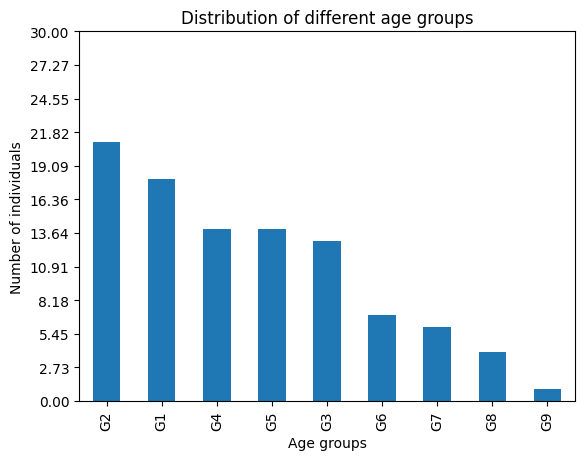

In [ ]:
data['Age'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals',
                                title='Distribution of different age groups', yticks=np.linspace(0,30,12))

In [ ]:
data2 = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data2.shape)
data2.columns

(98, 80)


Index(['Num. Employees_100-500', 'Num. Employees_26-100',
       'Num. Employees_500-1000', 'Num. Employees_6-25',
       'Num. Employees_More than 1000', 'Tech company?_Yes',
       'M-H benefits?_No', 'M-H benefits?_Yes', 'Workplace Discussion?_No',
       'Workplace Discussion?_Yes', 'Medical Coverage?_Yes',
       'Current illness_No', 'Current illness_Possibly', 'Current illness_Yes',
       'Previously diagnosed?_Unspecified', 'Previously diagnosed?_Yes',
       'Sought help?_Yes', 'Illness history?_No', 'Illness history?_Yes',
       'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5', 'Age_G6', 'Age_G7', 'Age_G8',
       'Age_G9', 'Gender_M', 'Gender_O', 'Live Country_Australia',
       'Live Country_Austria', 'Live Country_Bangladesh',
       'Live Country_Brazil', 'Live Country_Bulgaria', 'Live Country_Canada',
       'Live Country_China', 'Live Country_Colombia', 'Live Country_Estonia',
       'Live Country_Finland', 'Live Country_Germany', 'Live Country_Greece',
       'Live Country_Ind

In [ ]:
X = data2.drop('Current illness_Yes', axis=1)
y = data2['Current illness_Yes']

In [ ]:
#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Num. Employees_100-500: 0.104863
 Num. Employees_26-100: 0.254694
 Num. Employees_500-1000: 1.752581
 Num. Employees_6-25: 1.752581
 Num. Employees_More than 1000: 0.465035
 Tech company?_Yes: 0.098369
 M-H benefits?_No: 1.174538
 M-H benefits?_Yes: 3.133332
 Workplace Discussion?_No: 0.212325
 Workplace Discussion?_Yes: 1.591065
 Medical Coverage?_Yes: 3.262398
 Current illness_No: 17.119403
 Current illness_Possibly: 9.716418
 Previously diagnosed?_Unspecified: 31.000000
 Previously diagnosed?_Yes: 60.516129
 Sought help?_Yes: 14.744824
 Illness history?_No: 7.558337
 Illness history?_Yes: 5.927780
 Age_G2: 2.922003
 Age_G3: 0.004481
 Age_G4: 0.815599
 Age_G5: 6.902263
 Age_G6: 2.106403
 Age_G7: 0.621409
 Age_G8: 0.623977
 Age_G9: 0.462687
 Gender_M: 0.061627
 Gender_O: 1.247954
 Live Country_Australia: 0.925373
 Live Country_Austria: 0.462687
 Live Country_Bangladesh: 0.462687
 Live Country_Brazil: 0.162735
 Live Country_Bulgaria: 2.161290
 Live Country_Canada: 0.925373
 Live Count

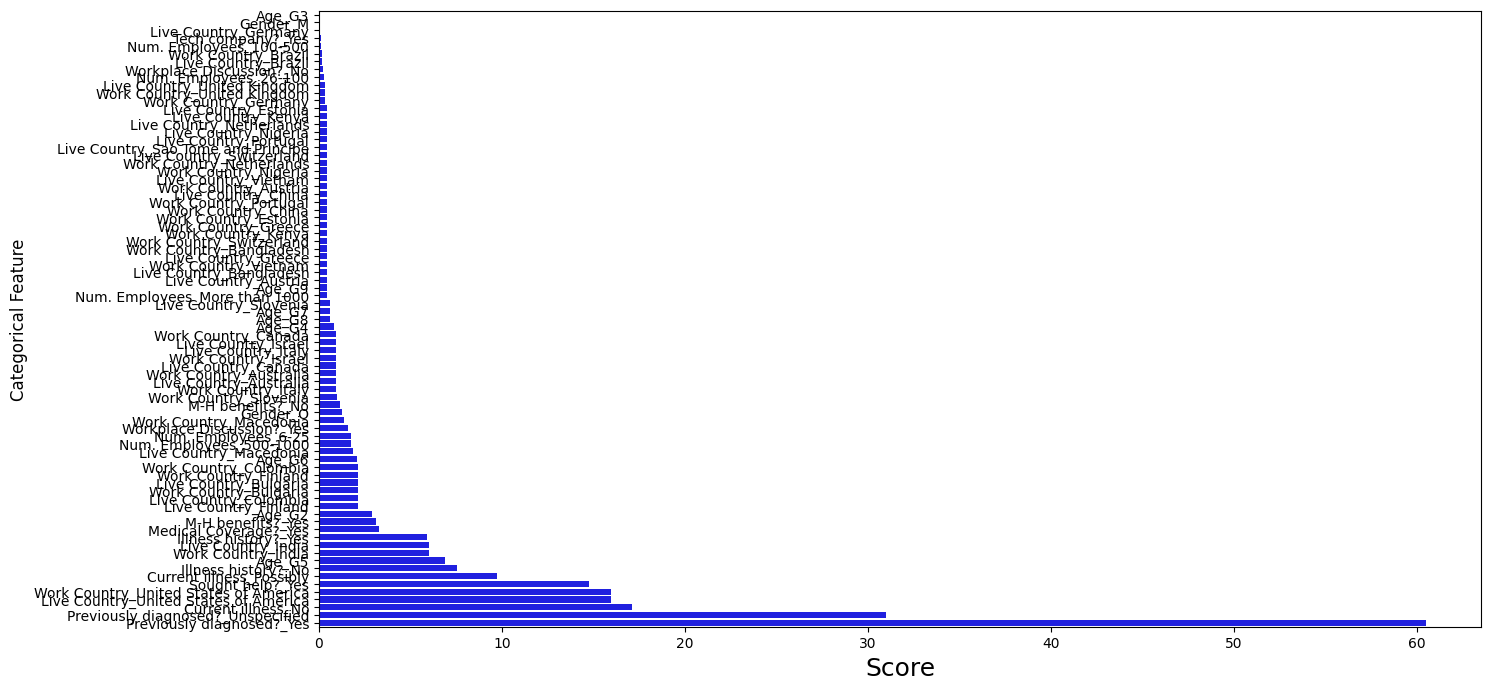

In [ ]:
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
X1 = data.drop('Current illness', axis=1)
y1 = data['Current illness']

In [ ]:
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

#Prepare target variable
#Label encoder is used to encode the output, or target variable,
#  in this case if the entry individual has a current mental illness or not
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [ ]:
print(X_enc.shape)
X_enc

(98, 12)


array([[ 2.,  1.,  0., ...,  0., 25., 24.],
       [ 3.,  1.,  2., ...,  1.,  4.,  4.],
       [ 1.,  1.,  2., ...,  1.,  4.,  4.],
       ...,
       [ 2.,  1.,  1., ...,  1., 11., 11.],
       [ 1.,  1.,  1., ...,  1., 20., 20.],
       [ 2.,  1.,  0., ...,  1., 22., 21.]])

In [ ]:
print(y_enc.shape)
y_enc

(98,)


array([2, 1, 1, 1, 1, 3, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 3, 2, 1, 1,
       2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 1, 3, 3, 1, 0,
       3, 1, 0, 3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 2, 3, 2, 0, 3, 2, 3, 3, 1, 1, 2, 1,
       1, 3, 3, 0, 2, 3, 1, 3, 1, 3])

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

ValueError: ignored

In [ ]:
np.any(np.isnan(X_enc))

True

In [ ]:
np.mean(X_enc)

nan

In [ ]:
X_enc[np.isnan(X_enc)] = 0

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Num. Employees: 0.242693
 Tech company?: 0.194741
 M-H benefits?: 3.670339
 Workplace Discussion?: 1.801108
 Medical Coverage?: 3.935048
 Previously diagnosed?: 10.982166
 Sought help?: 18.976613
 Illness history?: 2.292925
 Age: 16.483796
 Gender: 0.494195
 Live Country: 61.449192
 Work Country: 51.759088


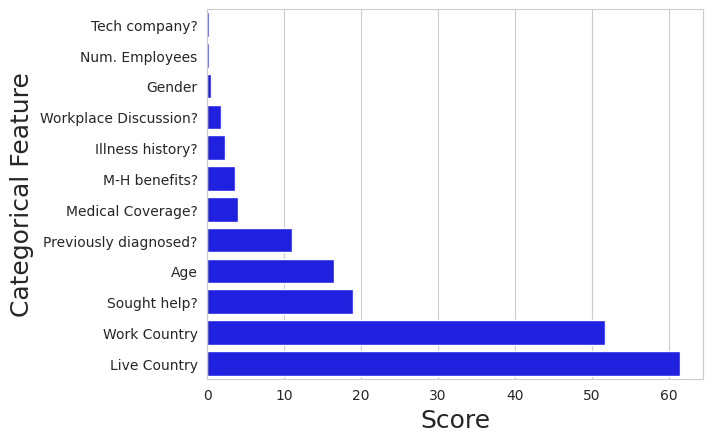

In [ ]:
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=datset1['scores'], y=datset1['feature'], color='blue')
#Set style
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
data.drop(columns=['Workplace Discussion?', 'Tech company?'],
          inplace=True)

In [ ]:
data.to_csv('Data_2021.csv')

In [ ]:
df = pd.read_csv('/content/Data_2021.csv')

In [ ]:
df

,Unnamed: 0,Num. Employees,M-H benefits?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
0,0,26-100,I don't know,Yes,Possibly,Unspecified,No,I don't know,G3,F,United States of America,United States of America
1,1,500-1000,Yes,Yes,No,Unspecified,No,No,G6,M,Brazil,Brazil
2,2,100-500,Yes,Yes,No,Unspecified,No,No,G4,M,Brazil,Brazil
3,4,More than 1000,Yes,Yes,No,Unspecified,Yes,No,G4,F,Canada,Canada
4,5,6-25,No,Yes,No,Unspecified,No,No,G3,F,United States of America,United States of America
5,6,More than 1000,No,Yes,Yes,No,No,No,G4,F,United States of America,United States of America
6,7,More than 1000,Yes,Yes,Don't Know,Unspecified,No,I don't know,G1,F,Germany,Germany
7,8,More than 1000,No,NaN,No,Unspecified,No,No,G1,F,India,India
8,11,26-100,No,NaN,No,Unspecified,No,No,G3,M,India,India
9,14,100-500,No,NaN,Possibly,Unspecified,No,Yes,G2,M,Macedonia,Macedonia


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df.to_csv('Data_2021.csv')